Data exploration using word cloud

In [1]:
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
clear_output()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno #For missing value visualization

import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import time

In [6]:
#For NLP
import re
import nltk
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
nltk.download('omw-1.4')
clear_output()

In [8]:
data = pd.read_csv('data.csv')
data.head()

index                      title    genre   
0      0          Drowned Wednesday  fantasy  \
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...

In [10]:
data.shape

(4657, 4)

In [11]:
data.nunique()

index      4657
title      4296
genre        10
summary    4542
dtype: int64

In [12]:
data.nunique()

index      4657
title      4296
genre        10
summary    4542
dtype: int64

In [13]:
data.drop('index',inplace = True,axis = 1)
data.head()

title    genre   
0          Drowned Wednesday  fantasy  \
1              The Lost Hero  fantasy   
2  The Eyes of the Overworld  fantasy   
3            Magic's Promise  fantasy   
4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...

In [14]:
#cleaning unecessary text from the string 
Stopwords = set(stopwords.words('english'))
def clean(text):
    text = text.lower() #Converting to lowerCase
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text) #removing punctuation
    
    text_tokens = word_tokenize(text) #removing stopwords
    tw = [word for word in text_tokens if not word in Stopwords]
    text = (" ").join(tw)
    
    splt = text.split(' ')
    output = [x for x in splt if len(x) > 3] #removing words with length<=3
    text = (" ").join(output)
    
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) #removing single character 
    text = re.sub('<.*?>+',' ',text) #removing HTML Tags
    text = re.sub('\n', ' ',text) #removal of new line characters
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    return text

In [15]:

data['summary'] = data['summary'].apply(clean)
data['title'] = data['title'].apply(clean)

In [16]:
data['genre'].value_counts()

genre
thriller      1023
fantasy        876
science        647
history        600
horror         600
crime          500
romance        111
psychology     100
sports         100
travel         100
Name: count, dtype: int64

In [18]:


def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(summary)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
def make_string(genre):
    s = ""
    for row_index,row in data.iterrows():
        if(row['genre'] == genre):
            s+=(row['summary']+' ')
    return s
    



thriller


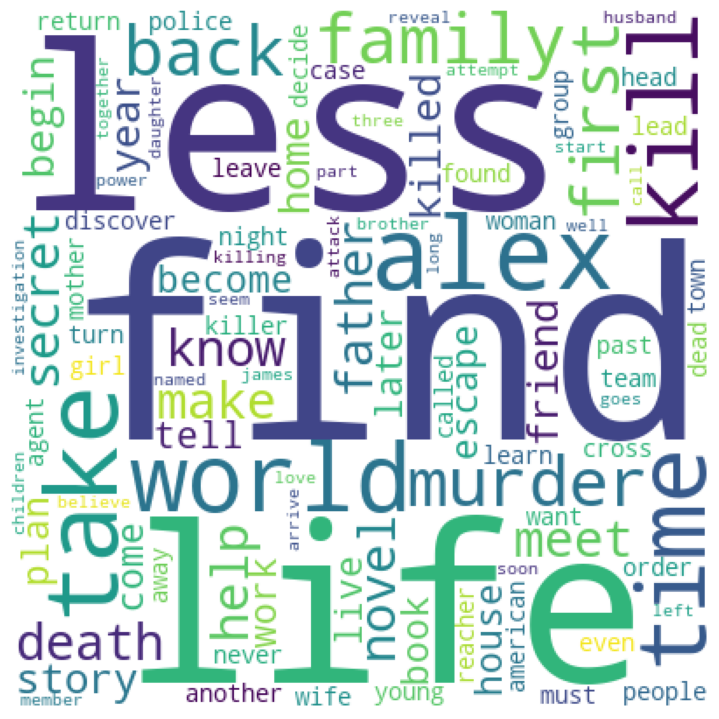

fantasy


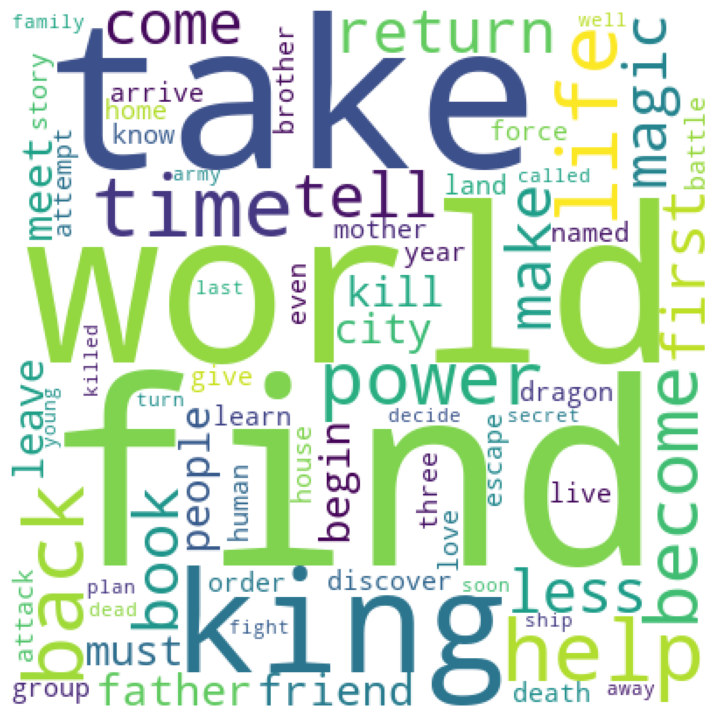

science


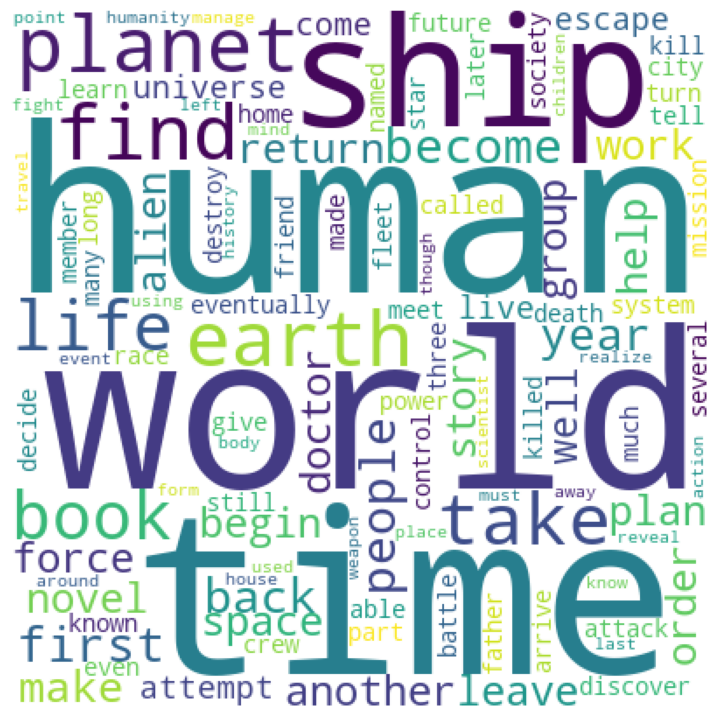

history


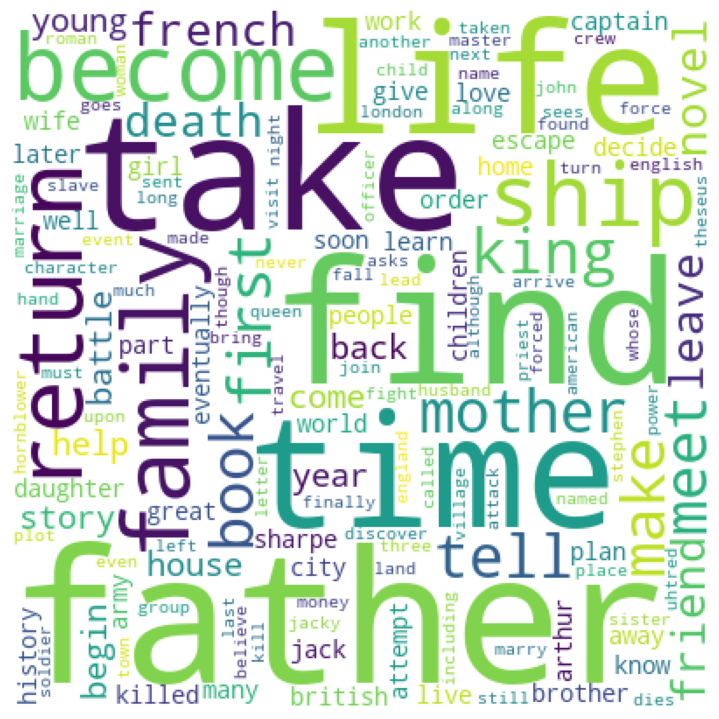

horror


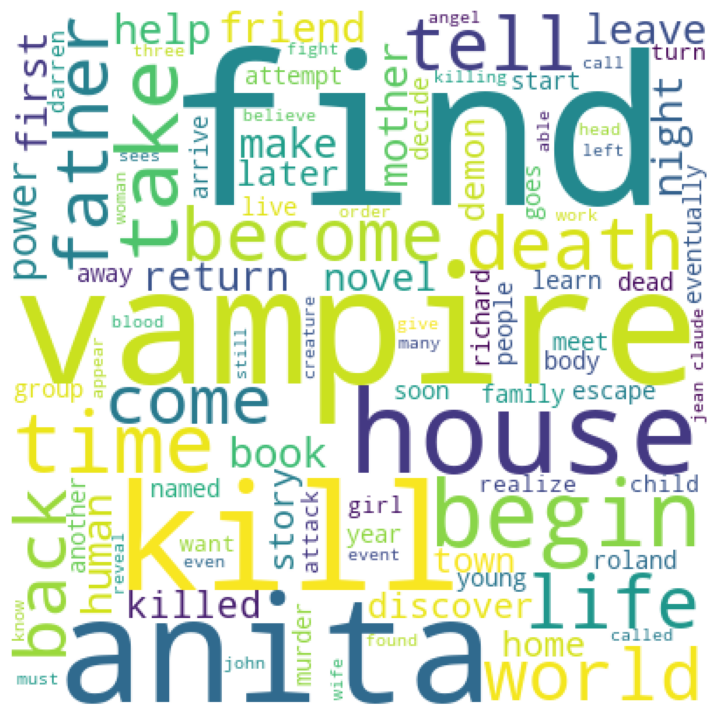

crime


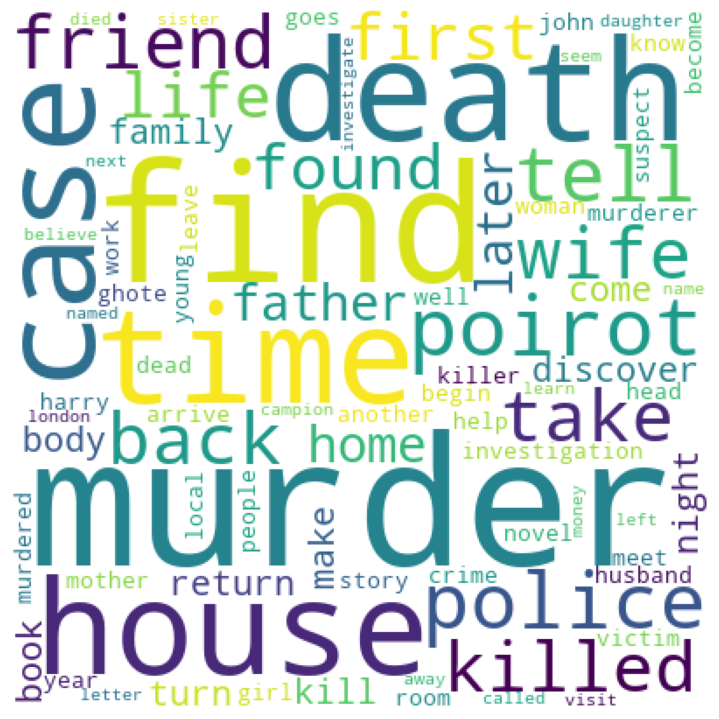

romance


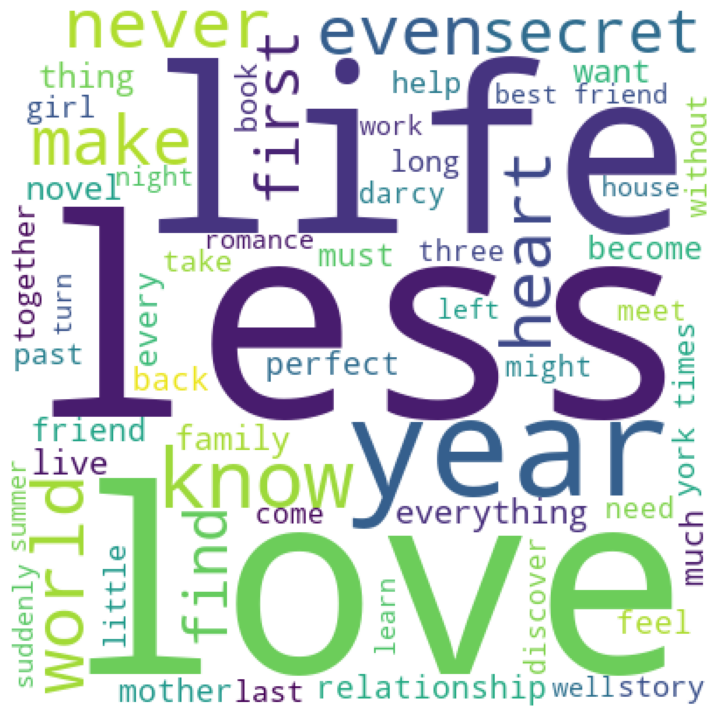

psychology


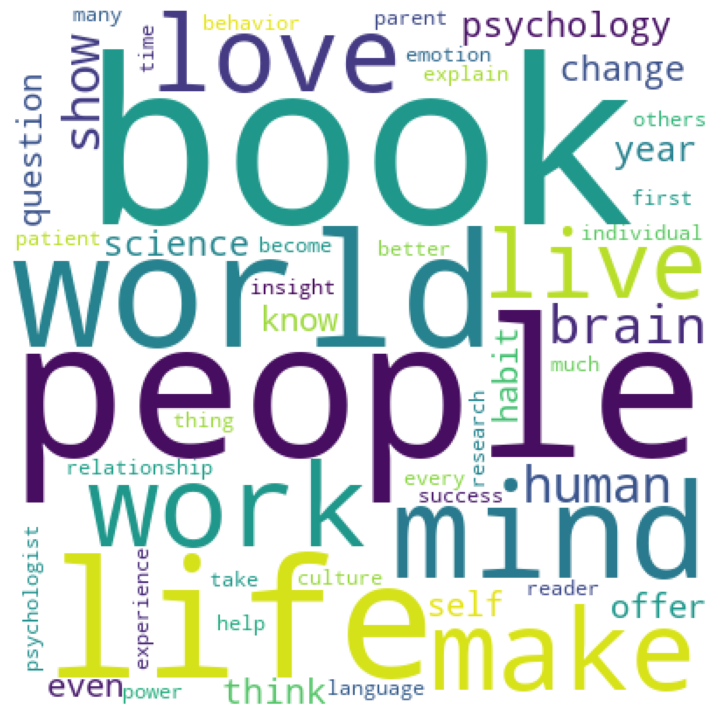

sports


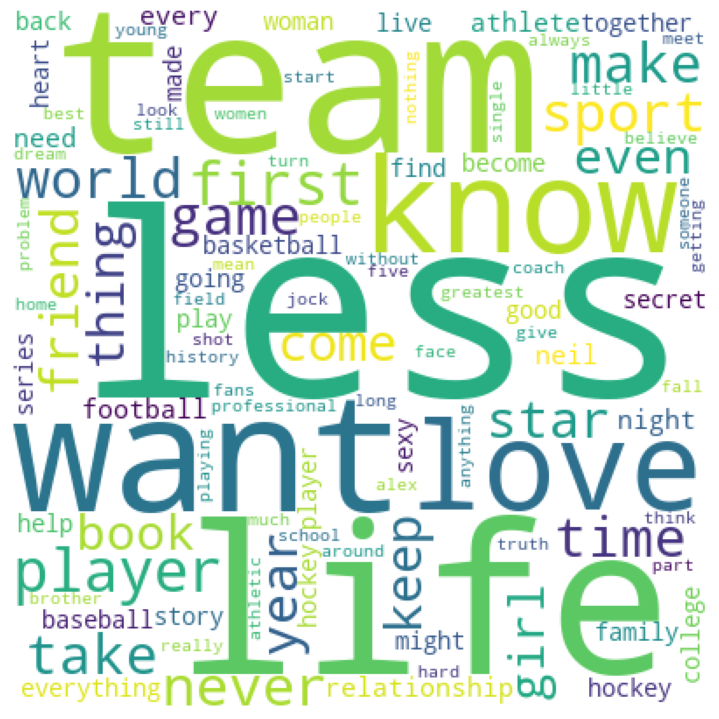

travel


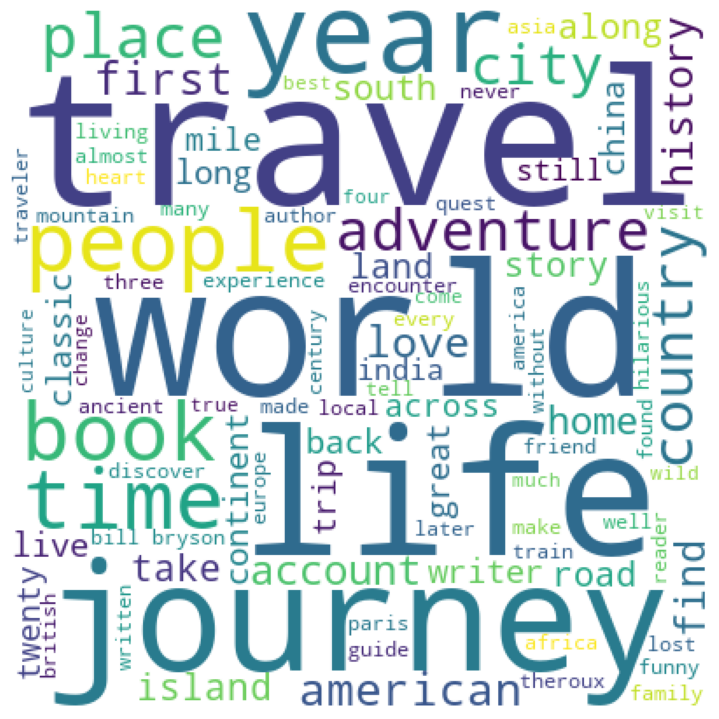

In [19]:
genre = ['thriller','fantasy','science','history','horror','crime','romance',
                                'psychology','sports','travel']
for Genre in genre:
    summary = make_string(Genre)
    print_wordCloud(Genre,summary)

In [23]:
import json
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordCloud_to_dict(genre, summary):
    print(genre)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, width=400, height=400, background_color='white', min_font_size=10).generate(summary)
    word_freqs = Counter(wordcloud.words_).most_common(20)
    return {genre: word_freqs}

def make_string(genre):
    s = ""
    for row_index, row in data.iterrows():
        if(row['genre'] == genre):
            s += (row['summary'] + ' ')
    return s

genre = ['thriller', 'fantasy', 'science', 'history', 'horror', 'crime', 'romance', 'psychology', 'sports', 'travel']
top_words = {}

for Genre in genre:
    summary = make_string(Genre)
    top_words.update(wordCloud_to_dict(Genre, summary))

with open('top_words.json', 'w') as outfile:
    json.dump(top_words, outfile)


thriller
fantasy
science
history
horror
crime
romance
psychology
sports
travel
